In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Dataset lowvariance + correlation filter

In [2]:
lc_dataset = pd.read_csv("/media/kmdr7/Seagate/TA/DATASETS/DatasetSampled-15-20.csv")
lc_clean_dataset = lc_dataset.drop(columns=["Label"])
lc_label = lc_dataset["Label"]
lc_dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551388e+15,0.0,1.551388e+15,1.551388e+15,Malicious
1,6,5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551389e+15,0.0,1.551389e+15,1.551389e+15,Malicious
2,6,5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551390e+15,0.0,1.551390e+15,1.551390e+15,Malicious
3,6,259,6,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551388e+15,0.0,1.551388e+15,1.551388e+15,Malicious
4,6,255,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551388e+15,0.0,1.551388e+15,1.551388e+15,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59482,17,93506,1,1,33.0,49.0,33.0,33.0,33.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539340e+15,0.0,1.539340e+15,1.539340e+15,Benign
59483,17,129828,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539328e+15,0.0,1.539328e+15,1.539328e+15,Benign
59484,17,497,1,1,46.0,110.0,46.0,46.0,46.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539291e+15,0.0,1.539291e+15,1.539291e+15,Benign
59485,17,93431,1,1,33.0,49.0,33.0,33.0,33.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539331e+15,0.0,1.539331e+15,1.539331e+15,Benign


In [4]:
lc_label = le.fit_transform(lc_label)

In [6]:
print(lc_dataset.shape)
print(lc_label.shape)

(59487, 78)
(59487,)


# Dataset PCA

In [ ]:
pca_dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/04. Feature Selection/pca_dataset.csv")
pca_clean_dataset = pca_dataset.drop(columns=["Label"])
pca_label = pca_dataset["Label"]
pca_dataset

## Decission Tree [lowvariance + correlation filter]

In [7]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    lc_clean_dataset, lc_label, test_size=0.25, random_state=27
)

In [ ]:
X = pd.concat([x_train, y_train], axis=1)
X

In [ ]:
mal = X[X.Label == "Malware"]
ben = X[X.Label == "Benign"]

In [ ]:
ben_upsampled = resample(ben, replace=True, n_samples=len(mal), random_state=27)
ben_upsampled

In [ ]:
upsampled = pd.concat([mal, ben_upsampled])
y_train = upsampled.Label
x_train = upsampled.drop("Label", axis=1)
upsampled

In [8]:
# Cross Validation
dt_classifier = DecisionTreeClassifier(criterion="entropy")
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
y_pred = dt_classifier.predict(x_test)

In [10]:
scores = cross_val_score(estimator=dt_classifier, X=lc_clean_dataset, y=lc_label, cv=10, n_jobs=8)
print("mean: {:.8f} (std: {:.8f})".format(scores.mean(), scores.std()), end="\n\n" )

mean: 0.99959655 (std: 0.00013447)



In [11]:
 # Confussion Matrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print("True Positive: ", tp)
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)

True Positive:  6929
True Negative:  7937
False Positive:  4
False Negative:  2


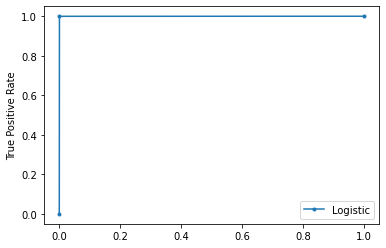

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [17]:
roc_auc_score(y_test, y_pred)

0.9996038632265432

In [ ]:
# Accuracy
y_pred = dt_classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
recall

In [ ]:
# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)
f1

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None) * 100
precision

In [ ]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf

In [ ]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    # plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    # plt.close()

In [ ]:
labels = ["BENIGN", "MALWARE"]
plot_confusion_matrix(conf, labels, "confusion_matrix.png")

## Decisstion Tree [pca]

In [ ]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    pca_clean_dataset, pca_label, test_size=1/7.0, random_state=0
)

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion="entropy")
dt_classifier.fit(x_train, y_train)
scores = cross_val_score(estimator=dt_classifier, X=pca_clean_dataset, y=pca_label, cv=10, n_jobs=4)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

In [ ]:
y_pred = dt_classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))